In [117]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import plot_confusion_matrix

## Dataset retrival ##

In [118]:
mushroom_data = pd.read_csv('mushroom.csv')

In [119]:
X = mushroom_data

In [120]:
y=mushroom_data.class_edible

## Dataset preprocessing using sklearn LabelEncoder##

sklearn offers a tool capable of preprocessing which converts non-numeric features in numeric ones. 

In [121]:
# Categorical boolean mask, stores all data objects different from numeric data
categorical_feature_mask = X.dtypes==object
# filter categorical columns using mask and turn it into a list for next encoding
categorical_cols = X.columns[categorical_feature_mask].tolist()

In [122]:
le = LabelEncoder()

In [123]:
# apply le on categorical feature columns
X[categorical_cols] = X[categorical_cols].apply(lambda col: le.fit_transform(col))

In [124]:
X[categorical_cols]

,class_edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


## Features selection for best accuracy ##

sklearn offers a series of tools capable of finding the best features for a Random Forest Classifier. The goal here is to determinate the best features to use for classification


In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.7)

In [126]:
selector = SelectFromModel(RandomForestClassifier(n_estimators = 1000))
selector.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=1000, n_jobs=None,
                                                 oob_score=False

In [108]:
selected_features= X_train.columns[(selector.get_support())]

## Model Training using selected features ##

The classificator used is a Random Forest, a generic classificator with good performances and low overfitting

In [128]:
X = mushroom_data[selected_features]

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.7)

In [130]:
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

In [131]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [133]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 1.00


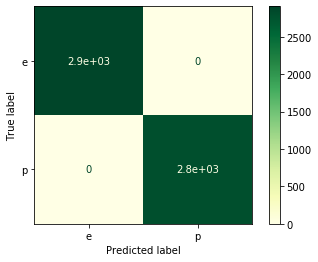

In [134]:
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.YlGn)